# Ejercicio 3 - Parcial

Generar 𝑛 = 100 samples de 𝑋1 ∼ U (0, 1), de 𝑍 ∼ N(0, 0.1) y de 𝜀 ∼ N(0, 1); a partir de ellas
generar 𝑛 samples de 𝑋2 := 0.5𝑋1 + 𝑍 y de

𝑌 := 2 + 2𝑋1 + 0.3𝑋2 + 𝜀.

## a)
Calcular la correlación entre las muestras de 𝑋1 y 𝑋2, y graficar su distribución conjunta.

### Desarrollo

Empiezo por generar todas las muestras que indica en el enunciado y definir las variables aleatorias:

In [1]:
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np

# Planto una semilla para que los resultados sean reproducibles
np.random.seed(0)

longitud_muestra = 100

# Genero las muestras de X1, Z y de 𝜀
X1 = uniform.rvs(size=longitud_muestra)
Z = norm.rvs(loc = 0, scale = 0.1 , size=longitud_muestra)
e = norm.rvs(loc = 0, scale = 1 , size=longitud_muestra)

# Ahora genero a X2 y a Y
X2 = 0.5*X1 + Z
Y = 2 + 2*X1 + 0.3*X2 + e

Ahora calculo la correlación entre X1 y X2:

In [2]:
print(f'La correlación entre X1 y X2 es: {np.corrcoef(X1, X2)[0,1]}')

La correlación entre X1 y X2 es: 0.8192633558220391


Armo el gráfico de la distribución conjunta:

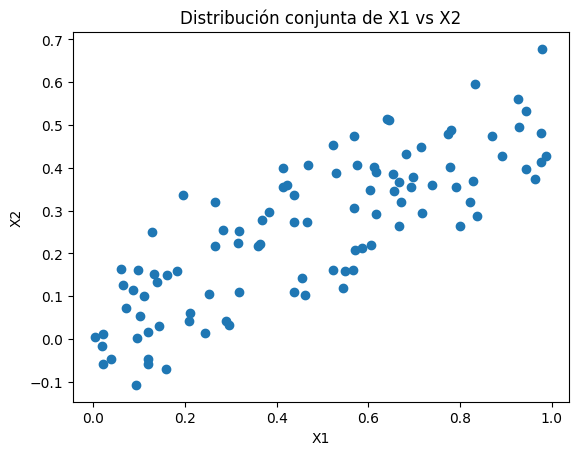

In [5]:
import matplotlib.pyplot as plt

plt.scatter(X1, X2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Distribución conjunta de X1 vs X2')
plt.show()

## b)
Ajusta un modelo de regresión lineal por mínimos cuadrados para predecir 𝑌 utilizando tanto
𝑋1 como 𝑋2. Describir los resultados obtenidos, incluyendo los coeficientes de regresión 𝛽ˆ0, 𝛽ˆ1 y 𝛽ˆ2, y analizar 
la relación entre estos coeficientes y los verdaderos 𝛽0, 𝛽1 y 𝛽2.

### Desarrollo

Hago el ajuste de regresión por mínimos cuadrados:

In [7]:
# Armo la matriz de diseño 
X_intercepto = np.column_stack((np.ones(longitud_muestra), X1, X2))

# Defino la función para ajustar por mínimos cuadrados
minimos_cuadrados = lambda X, Y: np.linalg.inv(X.T @ X) @ X.T @ Y

# Hago el ajuste
betas = minimos_cuadrados(X_intercepto, Y)

Y ahora hago la comparativa entre los verdaderos coeficientes y los estimados por mínimos cuadrados:

In [8]:
print(f'Comparativa coeficientes estimados vs reales:')
print(f'Intercepto: Estimado = {betas[0]}, Real = 2')
print(f'Coeficiente X1: Estimado = {betas[1]}, Real = 2')
print(f'Coeficiente X2: Estimado = {betas[2]}, Real = 0.3')

Comparativa coeficientes estimados vs reales:
Intercepto: Estimado = 1.9216645345431778, Real = 2
Coeficiente X1: Estimado = 1.2006795634351777, Real = 2
Coeficiente X2: Estimado = 1.4931301701048278, Real = 0.3
